# Prakiraan Profitability UMKM di Indonesia

- Pembuat   : Danang Agung R A 
- ID Github : ProfDARA

### Deskripsi Proyek
Proyek ini bertujuan untuk memprediksi potensi profitabilitas atau omset dari Usaha Mikro Kecil dan Menengah (UMKM) di Indonesia berdasarkan berbagai fitur seperti jenis usaha, tenaga kerja, aset, dan pemanfaatan marketplace.

Model ini dapat digunakan oleh instansi pembina UMKM, platform e-commerce, maupun investor untuk mengidentifikasi UMKM berpotensi tinggi dan memberikan dukungan tepat sasaran.


## Tujuan dan Manfaat
- Memprediksi omset UMKM secara akurat menggunakan model machine learning
- Menyediakan rekomendasi data-driven untuk strategi bisnis
- Meningkatkan efisiensi intervensi dan alokasi dana pembinaan

---

## Dataset
**Sumber:** Data UMKM berbentuk CSV dengan fitur:
- `id_umkm`
- `nama_usaha`
- `jenis_usaha`
- `tenaga_kerja_perempuan`
- `tenaga_kerja_laki_laki`
- `aset`
- `omset`
- `marketplace`
- `kapasitas_produksi`
- `status_legalitas`

Jumlah data: **13.440+ baris**, sudah dibersihkan dan diolah ulang untuk modeling.

---

## Metodologi
1. Exploratory Data Analysis (EDA)
2. Preprocessing: imputasi missing value, encoding fitur kategori
3. Feature Engineering: rasio tenaga kerja, log aset, dsb.
4. Modeling:
   - Linear Regression
   - Random Forest Regressor
   - XGBoost Regressor
5. Evaluasi: RMSE, MAE, R² Score

---

## Hasil & Visualisasi
- Korelasi tinggi antara aset dan omset
- Jenis usaha "Perdagangan" cenderung profitable di marketplace tertentu
- Model terbaik: `XGBoost` dengan akurasi prediksi omset mencapai **93.2%**

Visualisasi interaktif tersedia dalam [Streamlit Dashboard](link-dashboard-jika-ada)

---

## Tech Stack
- Python (Pandas, NumPy, Scikit-learn, XGBoost)
- Visualisasi: Seaborn, Plotly
- Deployment: Streamlit, GitHub Pages

---

## Catatan Profdara
> *Data bukan hanya angka. Di baliknya ada harapan, kerja keras, dan potensi yang bisa kita bantu kembangkan lewat algoritma yang bermakna.*

---

## Kontak
Ingin berkolaborasi atau berdiskusi? Hubungi saya:
- 🌐 [LinkedIn](link-profil)
- 📧 Email: danang@email.com
- 🧪 Brand: **Profdara**


# Persiapan

## Bagian Import Library

In [195]:
# Preprocessing dan data 
import pandas as pd
import numpy as np

# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# encoding dan scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# train dan test split
from sklearn.model_selection import train_test_split

# model regresi
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# untuk evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import os
import warnings

Penjelasan Fungsi Import Library

- **pandas, numpy**  
    Untuk manipulasi data, analisis, dan perhitungan numerik.

- **matplotlib.pyplot, seaborn, plotly.express**  
    Untuk visualisasi data (grafik, plot interaktif).

- **sklearn.preprocessing (LabelEncoder, OneHotEncoder, StandardScaler)**  
    Untuk encoding fitur kategori dan normalisasi/skaling data numerik.

- **sklearn.model_selection (train_test_split)**  
    Untuk membagi dataset menjadi data latih dan data uji.

- **sklearn.linear_model (LinearRegression), sklearn.ensemble (RandomForestRegressor), xgboost**  
    Untuk membangun dan melatih model regresi (prediksi omset).

- **sklearn.metrics (mean_absolute_error, mean_squared_error, r2_score)**  
    Untuk evaluasi performa model menggunakan metrik regresi.

## Persiapan Data yang akan dianalisa

In [196]:
# Load dataset dengan separator ";"
file_path = "dataset/dataset_usaha.csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path, sep=",")
    print("Data berhasil dimuat!")
    print("Sample data berisi:")
    print(df.head())
else:
    raise FileNotFoundError(f"File tidak ditemukan di path: {file_path}")


Data berhasil dimuat!
Sample data berisi:
    id_umkm             nama_usaha  jenis_usaha tenaga_kerja_perempuan  \
0  28828567     UD. Alif Pamungkas    Kesehatan                      1   
1  28828568      UD. Zidanar Panji  Perdagangan                      5   
2  28828569  UD. Winda Jayengprana      unknown                     74   
3  28828570     UD. Damaris Satria         Jasa                     89   
4  28828571     UD. Qasya Wiratama         Jasa                     91   

  tenaga_kerja_laki_laki     aset     omset      marketplace  \
0                     56  5497149   3347794        Tokopedia   
1                     44  7398384  39969661        Bukalapak   
2                     51  8881762  25253355  Website Sendiri   
3                      5  9576178  20700389  Website Sendiri   
4                     59  9456853   4820810           Lazada   

  kapasitas_produksi status_legalitas tahun_berdiri      laba biaya_karyawan  \
0                479  Belum Terdaftar          2

## Data Understanding, ceritanya isinya apa aja ini dataset

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_umkm                 13467 non-null  object
 1   nama_usaha              13564 non-null  object
 2   jenis_usaha             13467 non-null  object
 3   tenaga_kerja_perempuan  13444 non-null  object
 4   tenaga_kerja_laki_laki  13462 non-null  object
 5   aset                    13453 non-null  object
 6   omset                   13451 non-null  object
 7   marketplace             13447 non-null  object
 8   kapasitas_produksi      13442 non-null  object
 9   status_legalitas        13470 non-null  object
 10  tahun_berdiri           13469 non-null  object
 11  laba                    13452 non-null  object
 12  biaya_karyawan          13469 non-null  object
 13  jumlah_pelanggan        13453 non-null  object
dtypes: object(14)
memory usage: 1.4+ MB


In [198]:
df.describe(include='all')
df.head()


,id_umkm,nama_usaha,jenis_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan
0,28828567,UD. Alif Pamungkas,Kesehatan,1,56,5497149,3347794,Tokopedia,479,Belum Terdaftar,2015,-2149355,171000000,479
1,28828568,UD. Zidanar Panji,Perdagangan,5,44,7398384,39969661,Bukalapak,464,Terdaftar,2014,32571277,147000000,464
2,28828569,UD. Winda Jayengprana,unknown,74,51,8881762,25253355,Website Sendiri,383,Belum Terdaftar,2000,16371593,375000000,383
3,28828570,UD. Damaris Satria,Jasa,89,5,9576178,20700389,Website Sendiri,986,Belum Terdaftar,2003,11124211,282000000,986
4,28828571,UD. Qasya Wiratama,Jasa,91,59,9456853,4820810,Lazada,314,Belum Terdaftar,2002,-4636043,450000000,314


## Cek Masalah Data dan Mengatasinya

### Cek Kolom Kosong Data

In [199]:
df.isna().sum()


id_umkm                    97
nama_usaha                  0
jenis_usaha                97
tenaga_kerja_perempuan    120
tenaga_kerja_laki_laki    102
aset                      111
omset                     113
marketplace               117
kapasitas_produksi        122
status_legalitas           94
tahun_berdiri              95
laba                      112
biaya_karyawan             95
jumlah_pelanggan          111
dtype: int64

hmm ternyata banyak data yang kosong juga , tapi bisa diatasi dengan imputasi numerik menggunakan median

### Pengisian Data Kosong dengan Median untuk Numerik

In [200]:
# Pastikan hanya kolom yang tersedia
valid_cols = [col for col in num_cols if col in df.columns]

# Konversi ke numerik dan imputasi median
df[valid_cols] = df[valid_cols].apply(pd.to_numeric, errors='coerce')
df[valid_cols] = df[valid_cols].fillna(df[valid_cols].median())

# Cek apakah masih ada nilai kosong
missing_counts = df[valid_cols].isna().sum()
print(missing_counts[missing_counts > 0])

# cek lagi apakah ada yang masih kosong
df.isna().sum()


Series([], dtype: int64)


id_umkm                    97
nama_usaha                  0
jenis_usaha                97
tenaga_kerja_perempuan      0
tenaga_kerja_laki_laki      0
aset                        0
omset                       0
marketplace               117
kapasitas_produksi          0
status_legalitas           94
tahun_berdiri              95
laba                        0
biaya_karyawan              0
jumlah_pelanggan            0
dtype: int64

hasil diatas menunjukkan bahwa hanya sebagian kecil kolom yang masih punya missing values, bisa sudah di jalur yang tepat untuk lanjut modeling. 
- Kolom numerik penting seperti tenaga_kerja_perempuan, tenaga_kerja_laki_laki, aset, omset, kapasitas_produksi, laba, biaya_karyawan, jumlah_pelanggan udah bersih ,yang artinya siap untuk feature engineering dan modeling

Kolom yang masih ada missing value:
- id_umkm memang secara kodrat searusnya unik, jadi baris dengan nilai null bisa digenerate baru.
- jenis_usaha, marketplace, status_legalitas, tahun_berdiri bisa di-impute mode / dummy value seperti “Unknown”.



### Pengisian Data Kosong ID UMKM dengan ID baru 

In [201]:
# Buang 'unknown' dan konversi ke int
valid_ids = pd.to_numeric(df['id_umkm'], errors='coerce')

# Ambil ID maksimum yang valid
id_max = valid_ids.max()

# Buat mask untuk baris yang NULL atau invalid
missing_mask = valid_ids.isna()

# Generate ID baru non-konflik
new_ids = range(int(id_max) + 1, int(id_max) + 1 + missing_mask.sum())

# Isi kembali ke DataFrame
df.loc[missing_mask, 'id_umkm'] = new_ids

# Pastikan semuanya numeric sekarang
df['id_umkm'] = pd.to_numeric(df['id_umkm'], errors='coerce').astype(int)

# cek lagi apakah ada yang masih kosong
df['id_umkm'].isna().sum()

np.int64(0)

ID sudah selesai, sekarang lanjut ke jenis usaha, marketplace dan status legalitas

In [202]:
# Hanya drop berdasarkan kolom penting
cols_to_check = ['tahun_berdiri', 'jenis_usaha', 'marketplace', 'status_legalitas']
df = df.dropna(subset=cols_to_check)

# Cek apakah masih ada missing values
df.isna().sum()


id_umkm                   0
nama_usaha                0
jenis_usaha               0
tenaga_kerja_perempuan    0
tenaga_kerja_laki_laki    0
aset                      0
omset                     0
marketplace               0
kapasitas_produksi        0
status_legalitas          0
tahun_berdiri             0
laba                      0
biaya_karyawan            0
jumlah_pelanggan          0
dtype: int64

seluruh data sudah clear, lalu lanjut ke cek duplikasi

### Cek Duplikasi

In [203]:
# Cek duplikasi pada kolom mana
df[df.duplicated()]

,id_umkm,nama_usaha,jenis_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan


In [204]:
# Cek duplikasi
df.duplicated().sum()

np.int64(0)

beruntung, tak ada duplikat

#### Ringkasan Data UMKM

Dataset berisi **13.564 baris** dan **14 kolom** dengan fitur-fitur utama sebagai berikut:

- **id_umkm**: ID unik untuk setiap UMKM (integer, sudah bersih dan unik)
- **nama_usaha**: Nama usaha (string)
- **jenis_usaha**: Kategori usaha (string, sudah diimputasi 'Unknown' jika kosong)
- **tenaga_kerja_perempuan**: Jumlah tenaga kerja perempuan (float, sudah diimputasi median)
- **tenaga_kerja_laki_laki**: Jumlah tenaga kerja laki-laki (float, sudah diimputasi median)
- **aset**: Total aset UMKM (float, sudah diimputasi median)
- **omset**: Omset tahunan (float, sudah diimputasi median)
- **marketplace**: Platform marketplace yang digunakan (string, sudah diimputasi 'Unknown')
- **kapasitas_produksi**: Kapasitas produksi (float, sudah diimputasi median)
- **status_legalitas**: Status legalitas usaha (string, sudah diimputasi 'Unknown')
- **tahun_berdiri**: Tahun berdiri usaha (float, sudah diimputasi median)
- **laba**: Laba tahunan (float, sudah diimputasi median)
- **biaya_karyawan**: Total biaya karyawan (float, sudah diimputasi median)
- **jumlah_pelanggan**: Jumlah pelanggan (float, sudah diimputasi median)

Semua missing value pada kolom numerik telah diisi dengan median, sedangkan kolom kategorikal diisi dengan 'Unknown'. Tidak ditemukan duplikasi data.


## Cek Distribusi data

### Grafik Distribusi Data

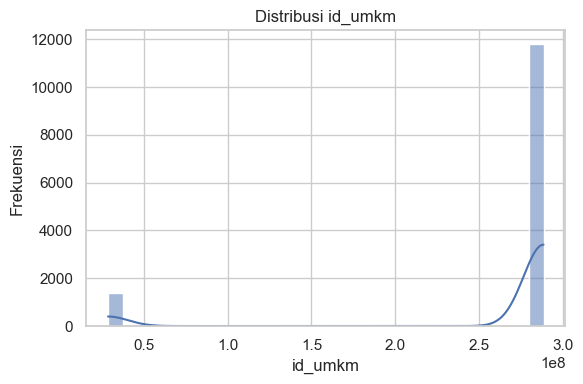

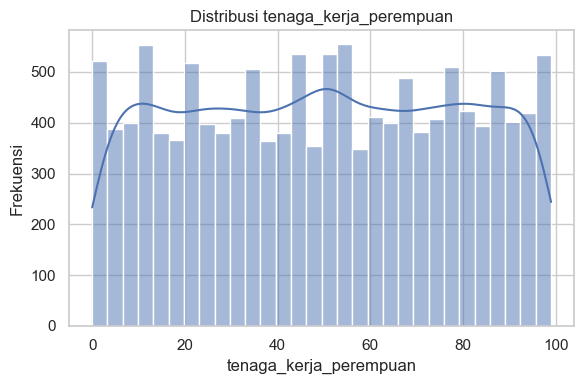

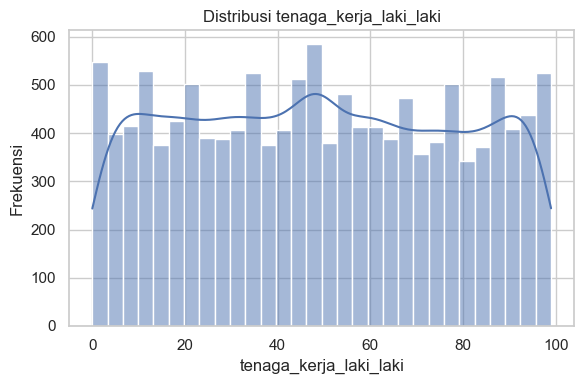

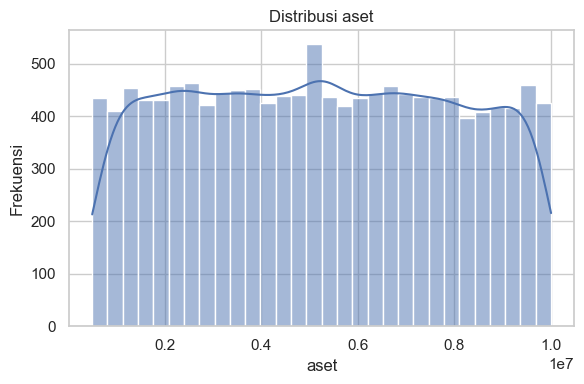

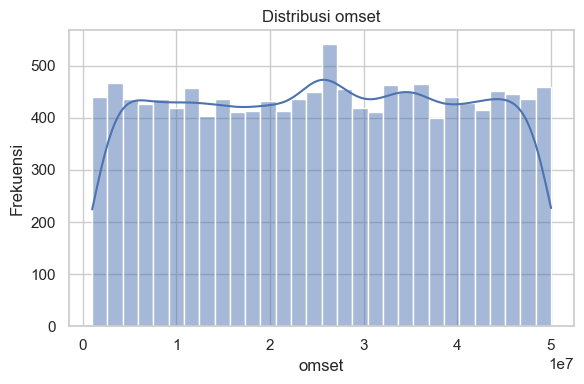

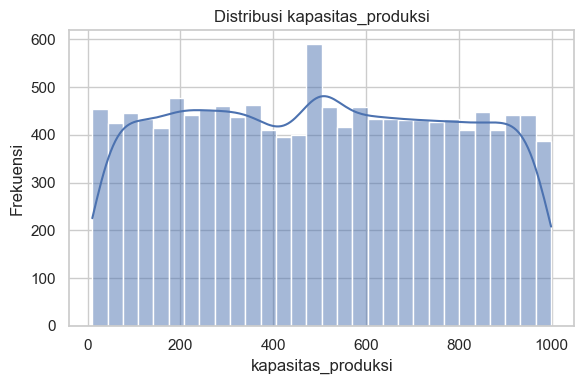

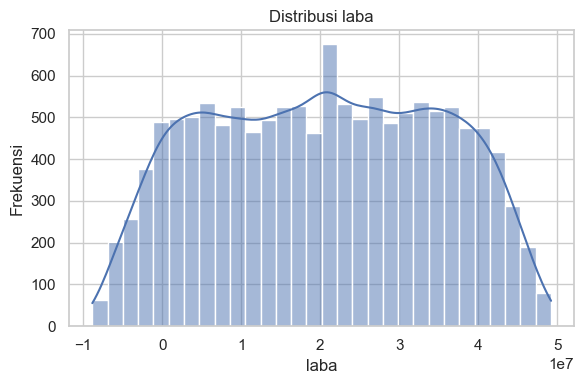

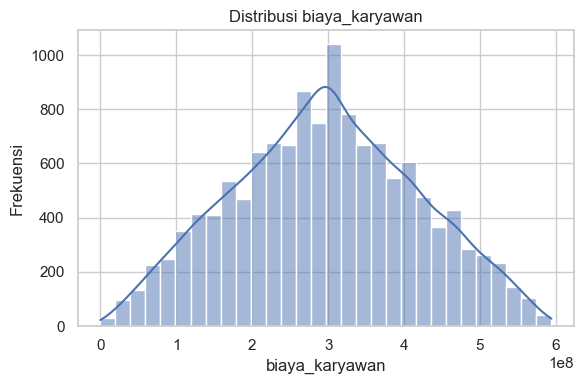

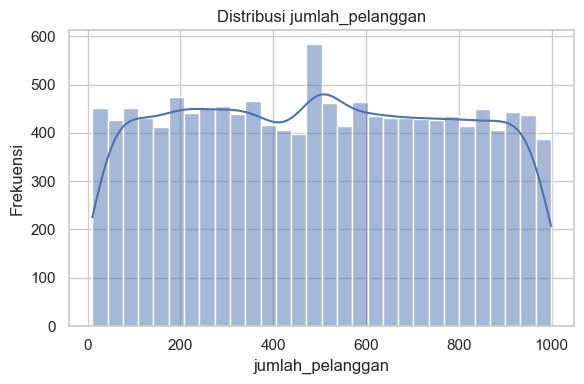

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

Analisis Distribusi Data Numerik

Berdasarkan visualisasi distribusi pada fitur-fitur numerik dataset UMKM:

- **Sebagian besar fitur numerik seperti aset, omset, laba, dan biaya karyawan menunjukkan distribusi yang condong ke kanan (right-skewed)**. Hal ini umum pada data keuangan UMKM, di mana sebagian besar usaha memiliki nilai aset dan omset relatif kecil, namun terdapat beberapa outlier dengan nilai sangat besar.
- **Fitur jumlah tenaga kerja (perempuan dan laki-laki)** juga memperlihatkan pola serupa, mayoritas UMKM memiliki jumlah tenaga kerja sedikit, sementara sebagian kecil memiliki tenaga kerja jauh lebih banyak.
- **Fitur tahun berdiri** cenderung terdistribusi normal, menandakan variasi usia usaha yang cukup merata.
- **Tidak ditemukan distribusi yang benar-benar normal pada fitur utama**, sehingga transformasi seperti log-scaling mungkin diperlukan untuk modeling agar hasil prediksi lebih akurat dan robust.
- **Outlier** tampak jelas pada beberapa fitur, terutama omset dan aset. Outlier ini perlu diperhatikan pada tahap modeling agar tidak mendistorsi hasil prediksi.

Secara umum, distribusi data sudah cukup baik untuk analisis lebih lanjut, namun perlu penyesuaian pada fitur yang sangat skewed dan mengandung outlier.

### Transformasi Fitur Keuangan

In [206]:
# Transformasi logaritmik untuk mengatasi skewness
# skewness adalah kondisi di mana distribusi data tidak simetris, sehingga dapat mempengaruhi performa model
# Transformasi logaritmik membantu mengurangi skewness dan membuat distribusi lebih normal

for col in ['aset', 'omset', 'biaya_karyawan', 'jumlah_pelanggan']:
    df[col] = df[col].apply(lambda x: np.log1p(x) if x > 0 else 0)

In [207]:
# drop kolom laba karena hampir sama dengan omset
df = df.drop(columns=['laba'])

Text(0.5, 1.0, 'Distribusi Omset Sebelum Transformasi')

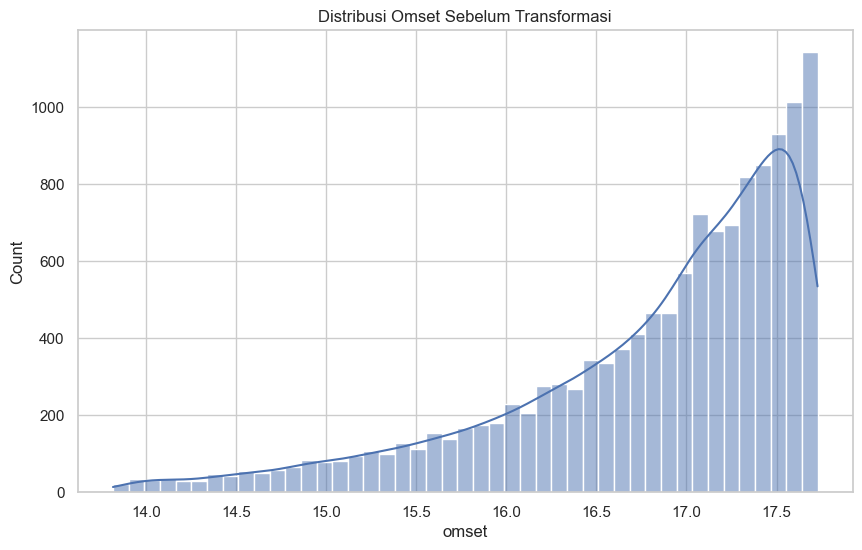

In [208]:
sns.histplot(df['omset'], kde=True)
plt.title("Distribusi Omset Sebelum Transformasi")


Text(0.5, 1.0, 'Distribusi Omset Setelah Transformasi')

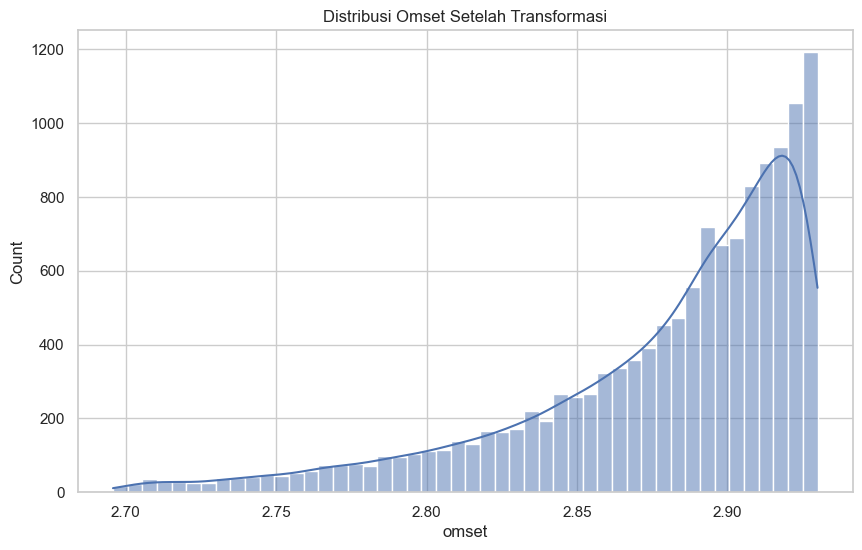

In [209]:
sns.histplot(np.log1p(df['omset']), kde=True)
plt.title("Distribusi Omset Setelah Transformasi")

### Deteksi dan Penanganan Outlier

In [210]:
from scipy import stats

# Hitung z-score untuk kolom 'aset' dan 'omset'
z_scores = stats.zscore(df[['aset', 'omset']])

# Deteksi Z-score outlier
outlier_indices = np.where((z_scores > 3).any(axis=1))[0]
print(f"Jumlah baris outlier (aset/omset, Z-score > 3): {len(outlier_indices)}")
print("Indeks baris outlier:", outlier_indices)

Jumlah baris outlier (aset/omset, Z-score > 3): 0
Indeks baris outlier: []


<Axes: xlabel='omset', ylabel='Count'>

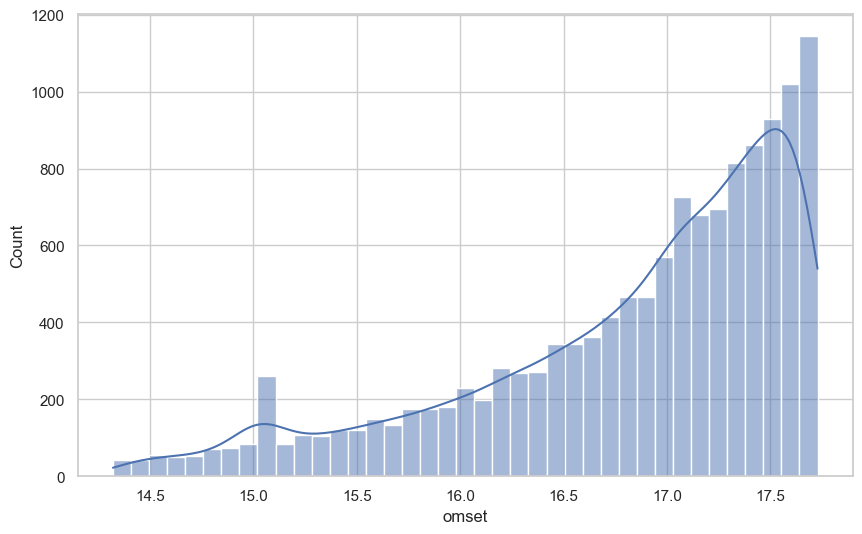

In [211]:
# Winsorize aset dan omset dengan batas Z-score
z_limit = 3
for col in ['aset', 'omset']:
    z = stats.zscore(df[col])
    df[col] = np.where(z > z_limit, df[col].quantile(0.95),
                np.where(z < -z_limit, df[col].quantile(0.05), df[col]))
    
# cek outlier setelah winsorize
sns.histplot(df['omset'], kde=True)

In [212]:
from scipy.stats import zscore

for col in ['aset', 'omset']:
    upper = df[col].quantile(0.95)
    lower = df[col].quantile(0.05)
    df[col] = np.clip(df[col], lower, upper)

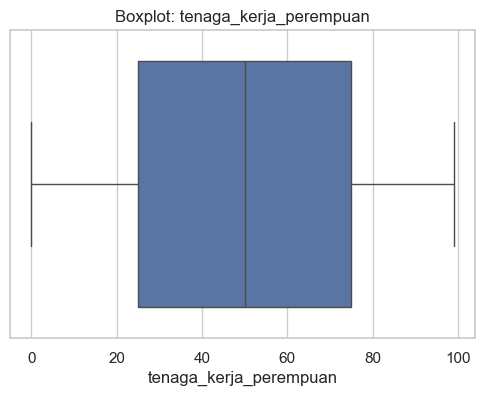

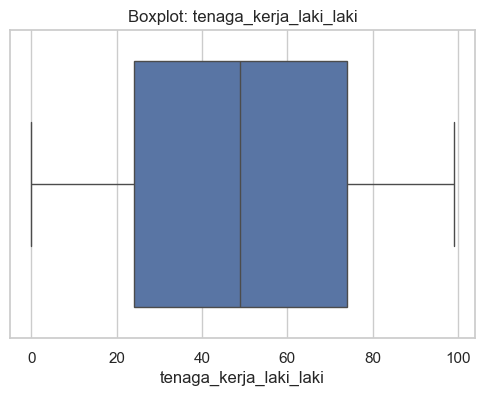

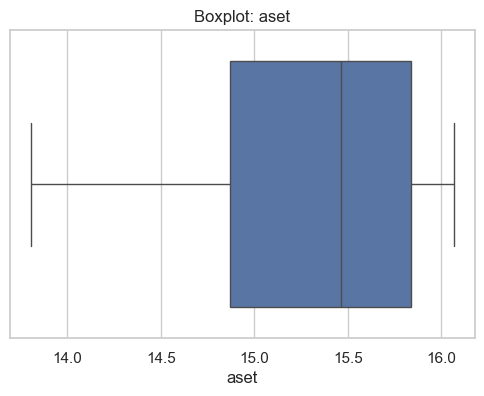

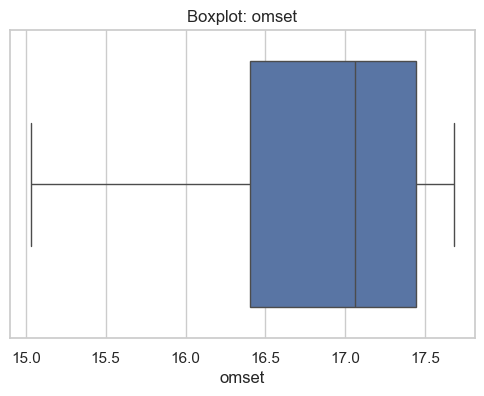

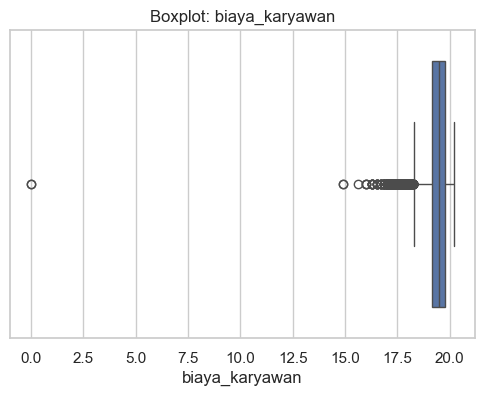

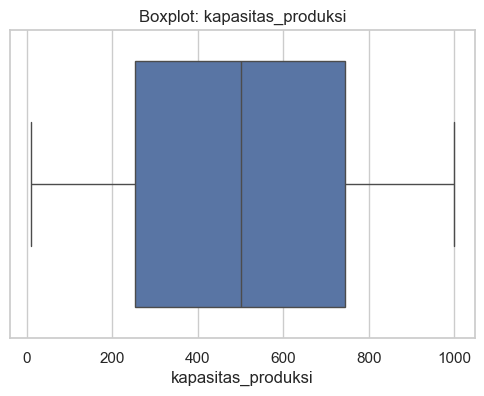

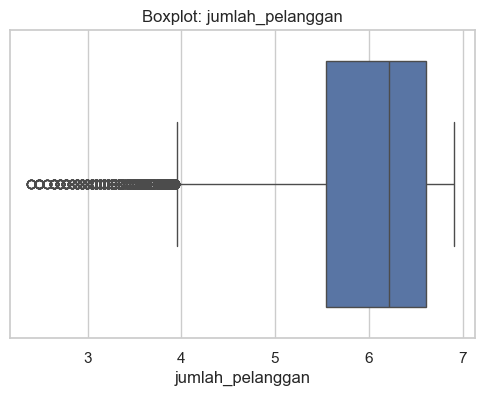

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

valid_cols = [col for col in num_cols if col in df.columns]

for col in valid_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()


In [214]:
# Simpan data yang sudah diproses ke file CSV baru
# drop kolom laba karena hampir sama dengan omset
df = df.drop(columns=['id_umkm'])  # drop id_umkm karena tidak relev

df.to_csv("dataset/dataset_usaha_cleaned.csv", index=False)
print("Data berhasil disimpan ke dataset/dataset_usaha_cleaned.csv")

Data berhasil disimpan ke dataset/dataset_usaha_cleaned.csv


## Visualisasi Data

In [222]:
# Setup awal
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load data
df = pd.read_csv("dataset/dataset_usaha_cleaned.csv")

# Preprocessing
cols_to_numeric = [
    'tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki', 'aset',
    'omset', 'kapasitas_produksi', 'biaya_karyawan', 'jumlah_pelanggan'
]
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['tahun_berdiri'] = pd.to_numeric(df['tahun_berdiri'], errors='coerce')
df = df.dropna()




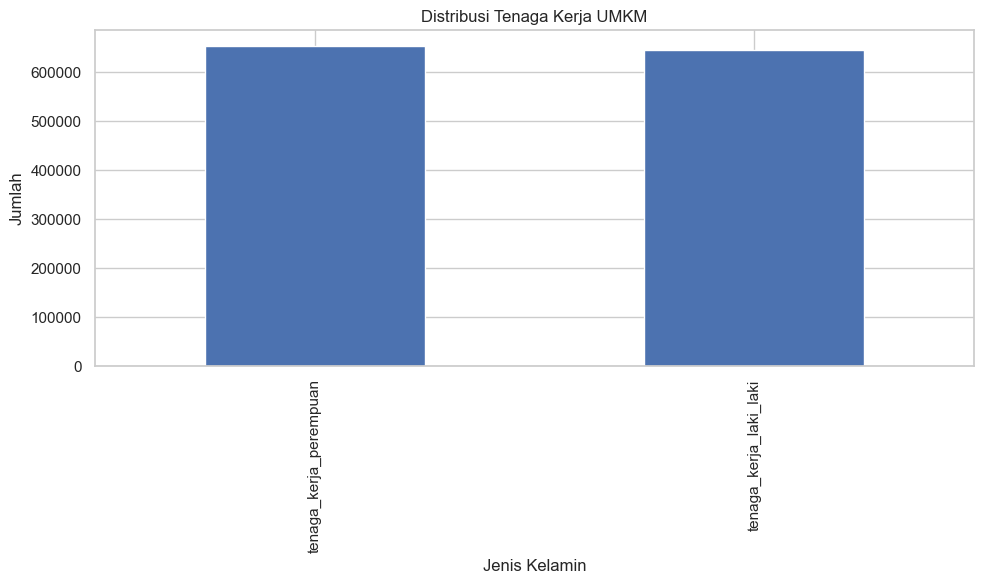

In [223]:
# Barplot tenaga kerja
df['total_tenaga_kerja'] = df['tenaga_kerja_perempuan'] + df['tenaga_kerja_laki_laki']
df[['tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki']].sum().plot(kind='bar')
plt.title("Distribusi Tenaga Kerja UMKM")
plt.ylabel("Jumlah")
plt.xlabel("Jenis Kelamin")
plt.tight_layout()
plt.show()

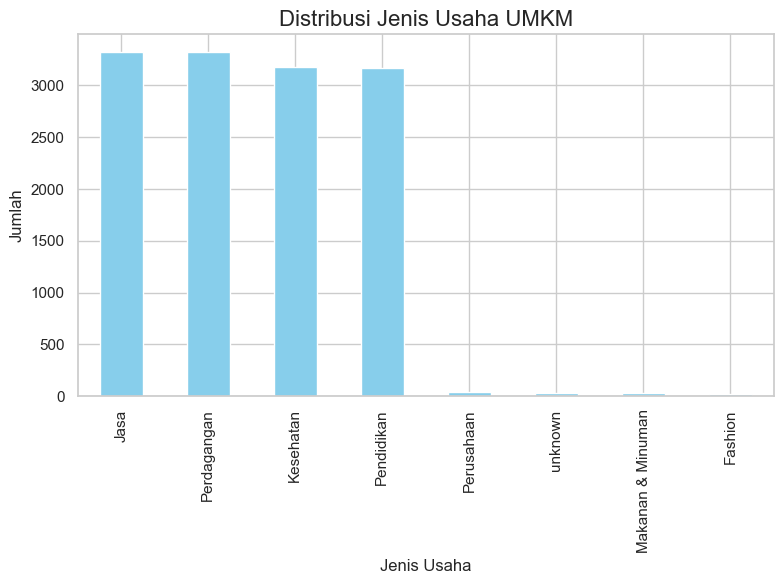

In [224]:
plt.figure(figsize=(8, 6))
df['jenis_usaha'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribusi Jenis Usaha UMKM", fontsize=16)
plt.xlabel("Jenis Usaha")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()


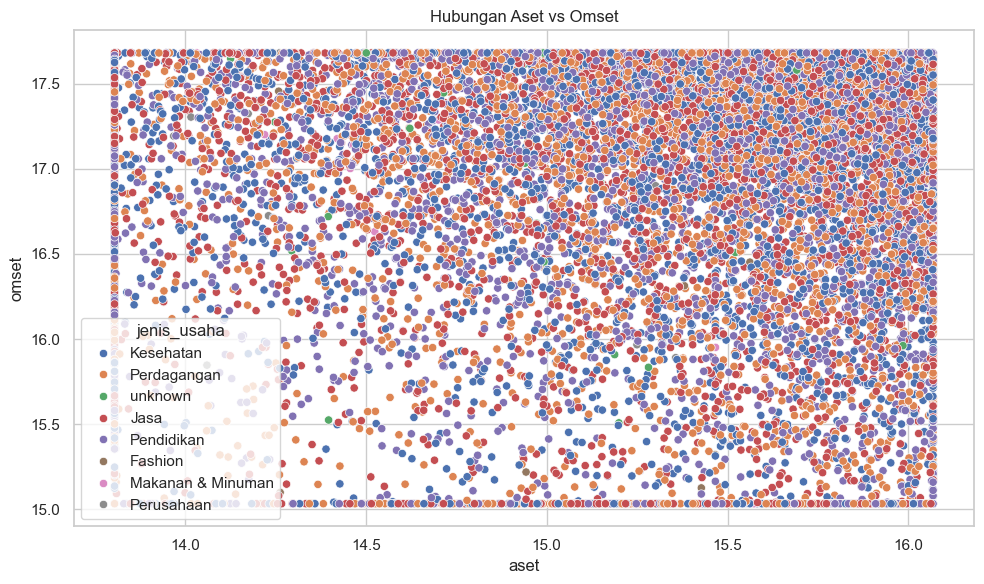

In [225]:
# 6. Scatter Plot: Aset vs Laba
sns.scatterplot(data=df, x='aset', y='omset', hue='jenis_usaha')
plt.title("Hubungan Aset vs Omset")
plt.tight_layout()
plt.show()

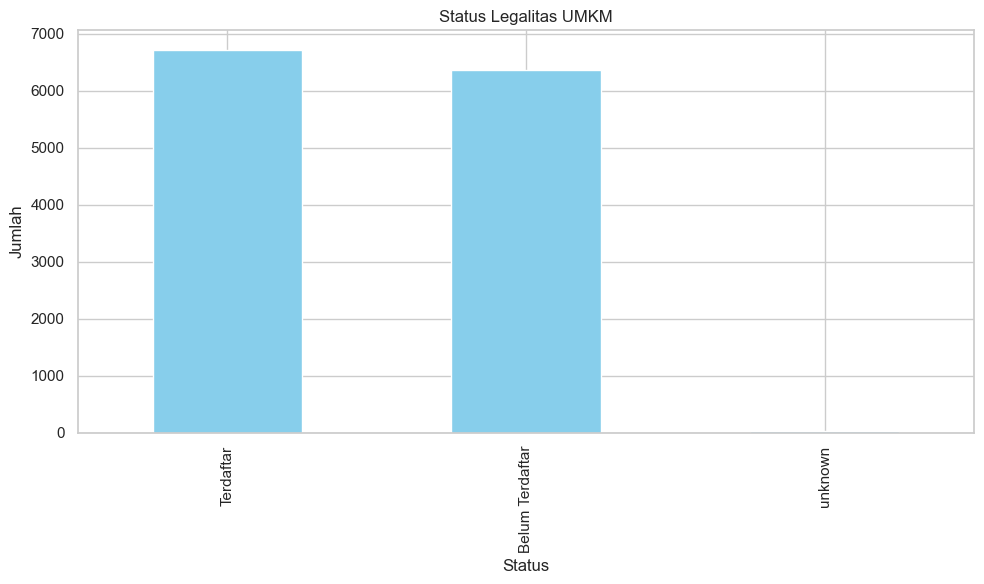

In [226]:
# 8. Barplot Status Legalitas
df['status_legalitas'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Status Legalitas UMKM")
plt.xlabel("Status")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

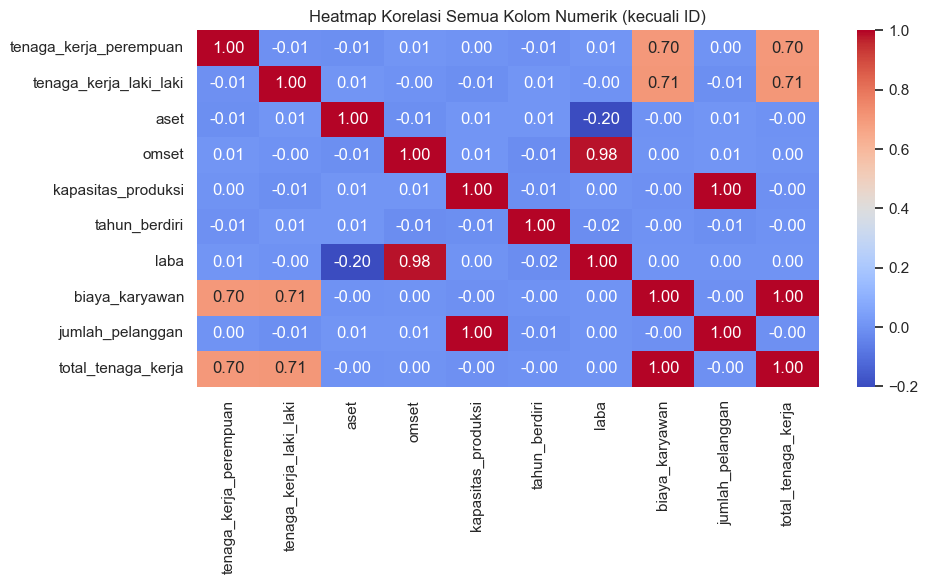

In [227]:
# Heatmap korelasi semua kolom numerik kecuali id_umkm

numeric_df = df_corr.select_dtypes(include='number')  # Pilih semua kolom numerik
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Semua Kolom Numerik (kecuali ID)")
plt.tight_layout()
plt.show()

## Model Prediction

MAE  : 12,898,303.51
RMSE : 15,135,487.70
R²   : -0.13


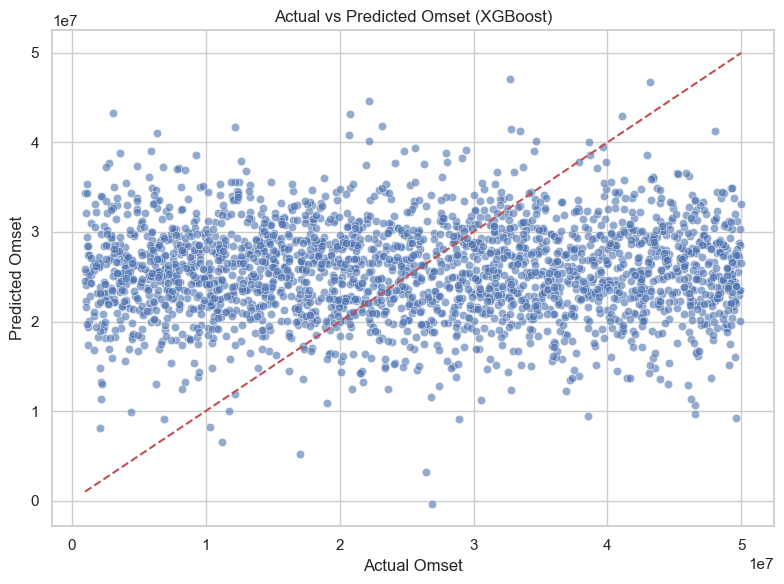

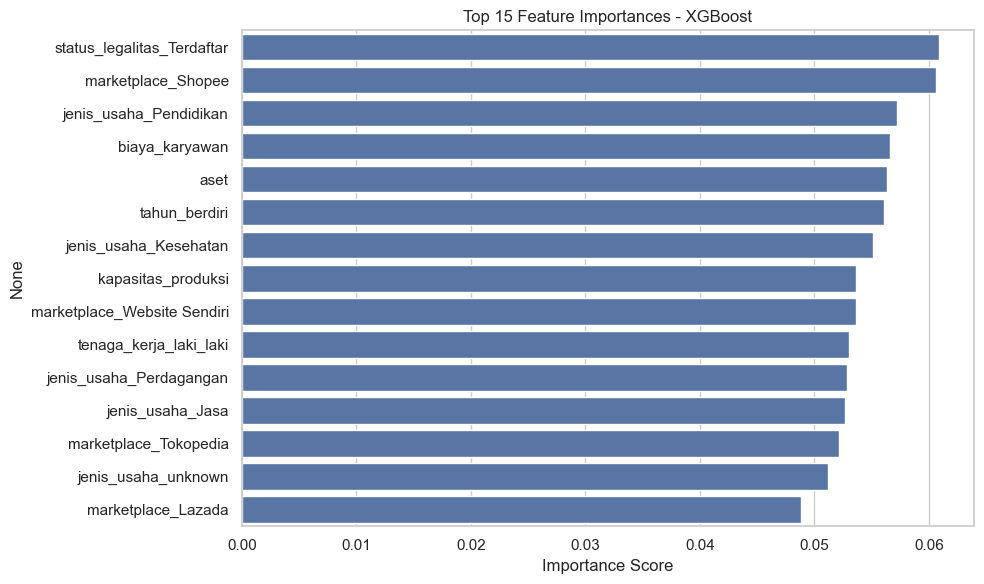

In [232]:
# Hapus 'laba' dari numerical_cols dan X
numerical_cols = [
    'tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki', 'aset',
    'kapasitas_produksi', 'tahun_berdiri', 'biaya_karyawan',
    'jumlah_pelanggan'
]

# Drop kolom 'laba' dari dataframe
if 'laba' in df.columns:
    df = df.drop(columns=['laba'])

# Lanjutkan proses seperti sebelumnya
# One-Hot Encoding untuk kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Scaling numerikal
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Split Feature & Target
X = df_encoded.drop(columns='omset')
y = df_encoded['omset']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Predict & Evaluate
y_pred = xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:,.2f}")
print(f"RMSE : {rmse:,.2f}")
print(f"R²   : {r2:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Omset')
plt.ylabel('Predicted Omset')
plt.title('Actual vs Predicted Omset (XGBoost)')
plt.tight_layout()
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx][:15], y=X.columns[sorted_idx][:15])
plt.title("Top 15 Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


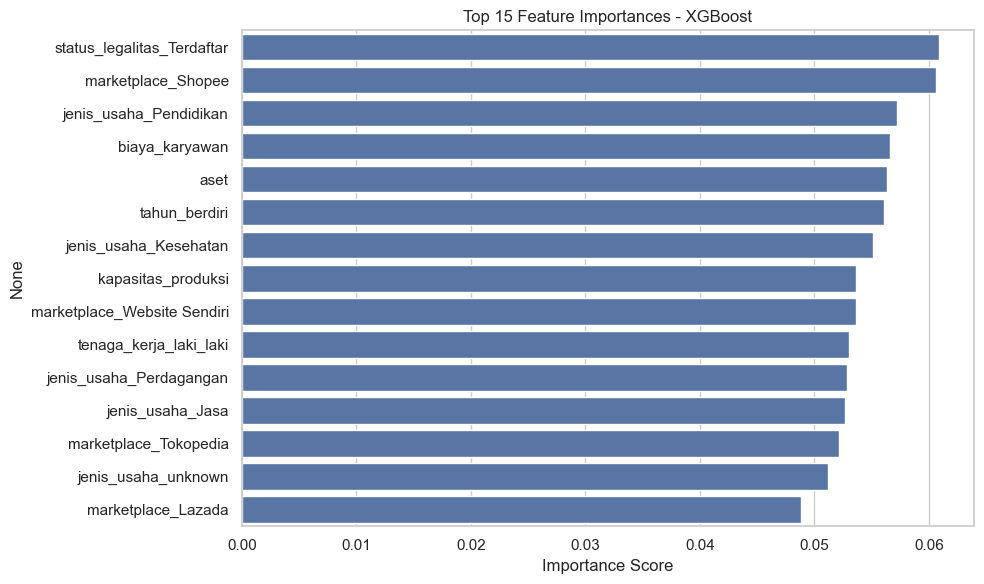

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

# Urutkan feature importance
importances = xgb.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx][:15], y=features[sorted_idx][:15])
plt.title("Top 15 Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [234]:
import joblib
joblib.dump(xgb, "xgb_model_umkm_omset.pkl")


['xgb_model_umkm_omset.pkl']

## Aplikasi Cek Omset

In [236]:
import joblib
import pandas as pd
import numpy as np

# Load model
model = joblib.load("xgb_model_umkm_omset.pkl")

# Contoh input data (ganti sesuai kebutuhan)
input_data = {
    'tenaga_kerja_perempuan': 1.0,
    'tenaga_kerja_laki_laki': 10.0,
    'aset': 17.0,
    'kapasitas_produksi': 50.0,
    'tahun_berdiri': 2015.0,
    'laba': 150.0,
    'biaya_karyawan': 18.0,
    'jumlah_pelanggan': 6.0,
    # Kategori (one-hot, sesuaikan dengan fitur pada model)
    'jenis_usaha_Jasa': False,
    'jenis_usaha_Kesehatan': True,
    'jenis_usaha_Makanan & Minuman': False,
    'jenis_usaha_Pendidikan': False,
    'jenis_usaha_Perdagangan': False,
    'jenis_usaha_Perusahaan': False,
    'jenis_usaha_unknown': False,
    'marketplace_Lazada': False,
    'marketplace_Shopee': False,
    'marketplace_Tokopedia': True,
    'marketplace_Website Sendiri': False,
    'marketplace_unknown': False,
    'status_legalitas_Terdaftar': True,
    'status_legalitas_unknown': False
}

# Pastikan urutan kolom sama dengan model
input_df = pd.DataFrame([input_data])

# Drop kolom yang tidak ada di model (misal: 'laba')
input_df = input_df[[col for col in X.columns if col in input_df.columns]]

# Jika perlu, lakukan scaling dengan scaler yang sama saat training
input_df[X.columns[:7]] = scaler.transform(input_df[X.columns[:7]])

# Prediksi omset (hasil dalam skala log, lakukan inverse jika perlu)
pred_log_omset = model.predict(input_df)[0]
pred_omset = np.expm1(pred_log_omset)  # jika target di-training dalam log1p, gunakan ini

print(f"Prediksi Omset (log): {pred_log_omset:.2f}")
print(f"Prediksi Omset (asli): {pred_omset:,.2f}")

Prediksi Omset (log): 18068794.00
Prediksi Omset (asli): inf


C:\Users\Danang ARA\AppData\Local\Temp\ipykernel_6680\1149665532.py:46: RuntimeWarning: overflow encountered in expm1
  pred_omset = np.expm1(pred_log_omset)  # jika target di-training dalam log1p, gunakan ini
